Nama : Fajar G_1151700010

In [0]:
# import library yang dibutuhkan

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
#import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [6]:
!wget -O file.csv https://raw.githubusercontent.com/solehT10/Data-Gizi-Buruk/master/Kel%20Batuceper%20file.csv

--2019-11-11 07:01:03--  https://raw.githubusercontent.com/solehT10/Data-Gizi-Buruk/master/Kel%20Batuceper%20file.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18669 (18K) [text/plain]
Saving to: ‘file.csv’

file.csv            100%[===================>]  18.23K  --.-KB/s    in 0.01s   

2019-11-11 07:01:03 (1.55 MB/s) - ‘file.csv’ saved [18669/18669]



In [7]:
df = pd.read_csv('file.csv')
df.head()

,No,jenis kelamin,BBTB,BBU,TBU,Status gizi,Unnamed: 6
0,1,L,0.35,0.65,-0.27,1,NaN
1,2,L,0.41,1.19,-0.75,1,NaN
2,3,L,-0.02,-0.38,0.31,1,NaN
3,4,L,-0.43,-0.64,0.04,1,NaN
4,5,L,-0.84,1.11,-2.07,1,NaN


In [9]:
df['Status gizi'].value_counts()

1    524
2    184
Name: Status gizi, dtype: int64

Text(0, 0.5, 'Frequency')

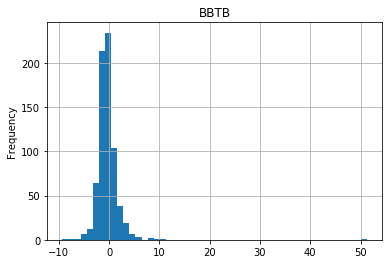

In [10]:
df.hist(column='BBTB', bins=50)
plt.ylabel("Frequency")

In [11]:
df.columns

Index(['No', 'jenis kelamin', 'BBTB', 'BBU', 'TBU', 'Status gizi',
       'Unnamed: 6'],
      dtype='object')

In [15]:
X = df[['BBTB', 'BBU', 'TBU']] .values  #.astype(float)
X[0:5]

array([[ 0.35,  0.65, -0.27],
       [ 0.41,  1.19, -0.75],
       [-0.02, -0.38,  0.31],
       [-0.43, -0.64,  0.04],
       [-0.84,  1.11, -2.07]])

In [16]:
y = df['Status gizi'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [17]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.25578886,  0.51624811, -0.18403113],
       [ 0.27852184,  0.61812331, -0.3058653 ],
       [ 0.11560214,  0.32193062, -0.03681483],
       [-0.03973991,  0.2728796 , -0.10534655],
       [-0.19508195,  0.60303069, -0.64090929]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (566, 3) (566,)
Test set: (142, 3) (142,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [21]:
yhat = neigh.predict(X_test)
yhat[0:50]

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2])

In [22]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9840989399293286
Test set Accuracy:  0.9647887323943662


In [23]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.99295775, 0.97183099, 0.98591549, 0.96478873, 0.97887324,
       0.97887324, 0.97887324, 0.97183099, 0.97183099])

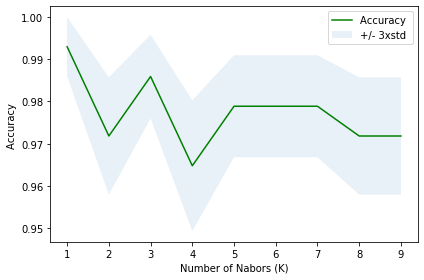

In [24]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [25]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9929577464788732 with k= 1
